In [1]:
%matplotlib notebook

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

from src import data_io
from models.vanilla_lstm import fit_preprocess_pipeline

sns.set_style('whitegrid')
sns.set_palette('Set2')

# Random Test Set

This notebook explored how the distribution of a randomly picked (randomized by trips) test set behaves.
The expectation is that it will be similar enough to the training set. 

Future work should create a test set to match the statistics of the real test set (overfit to the compitetion).

Another thing to notice is that this notebook uses a split that separate the last line (the prediciton line) from the features space. It seems that the competetion allows to see the features of the predicted line and this also can be corporated into our features (yep, it's a leakage, but again, overfitting the competetion is valid) e.g. we can see the `affiliate_id` of the last destination we need to predict.

# Prerequisites

In [40]:
# Load randomly split data sets
train, validation, test = data_io.load_split_train_validation_test(trip_length_threshold=4)

In [41]:
# Split to x, y
raw_train_x, train_y = data_io.separate_features_from_label(train)
raw_validation_x, validation_y = data_io.separate_features_from_label(validation)
raw_test_x, test_y = data_io.separate_features_from_label(test)

In [6]:
# Get Vanilla LSTM's preprocess pipeline
preprocess_pipeline = fit_preprocess_pipeline(features=train_x, labels=train_y)

In [7]:
# Transform data
train_x = preprocess_pipeline.transform(raw_train_x)
validation_x = preprocess_pipeline.transform(raw_validation_x)
test_x = preprocess_pipeline.transform(raw_test_x)

In [29]:
# Show features
train_x

,city_id,affiliate_id,hotel_country,device_class,booker_country,1_most_probable_city_id,2_most_probable_city_id,3_most_probable_city_id,4_most_probable_city_id,checkin_sin,checkin_cos,checkout_sin,checkout_cos,utrip_id
0,19910,114,36,1,2,920,2849,1869,2179,1,-1.60812e-16,0.992709,-0.120537,1000033_1
1,26835,123,36,0,2,920,2849,1869,2179,0.992709,-0.120537,0.992709,-0.120537,1000033_1
2,10957,123,36,0,2,920,2849,1869,2179,0.992709,-0.120537,0.992709,-0.120537,1000033_1
3,14169,123,36,0,2,920,2849,1869,2179,0.992709,-0.120537,0.992709,-0.120537,1000033_1
4,5834,2251,77,0,2,7777,4168,364,876,-0.239316,-0.970942,-0.239316,-0.970942,100008_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
758027,32826,114,52,1,2,2339,3129,3154,779,0.935016,-0.354605,0.935016,-0.354605,999855_1
758028,22960,114,52,1,2,2339,3129,3154,779,0.935016,-0.354605,0.935016,-0.354605,999855_1
758029,9218,1243,59,0,2,2057,4832,3370,2121,0.239316,-0.970942,0.239316,-0.970942,999944_1
758030,24277,628,59,0,2,2057,4832,3370,2121,0.239316,-0.970942,0.120537,-0.992709,999944_1


# Examination

## Label distribution

<IPython.core.display.Javascript object>


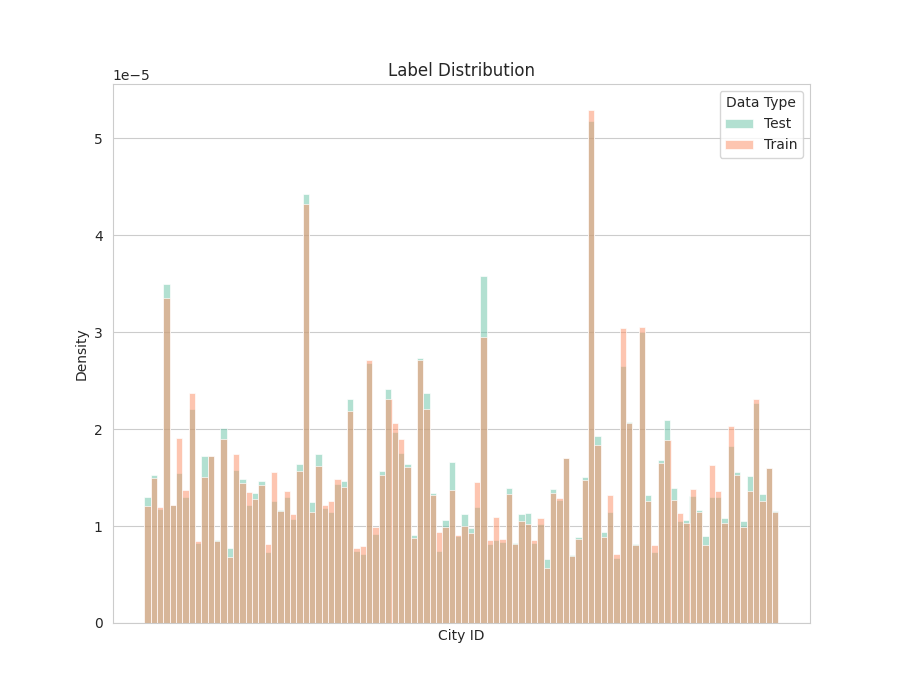

In [21]:
_, ax = plt.subplots(figsize=(9, 7))

sns.histplot(test_y.city_id, discrete=False, stat='density', bins=100, ax=ax, label='Test', 
             color=sns.color_palette()[0], alpha=0.5)
sns.histplot(train_y.city_id, discrete=False, stat='density', bins=100, ax=ax, label='Train', 
             color=sns.color_palette()[1], alpha=0.5)

ax.set(title='Label Distribution',
       xlabel='City ID',
       xticks=[])
ax.legend(title='Data Type');

## City ID distribution

<IPython.core.display.Javascript object>


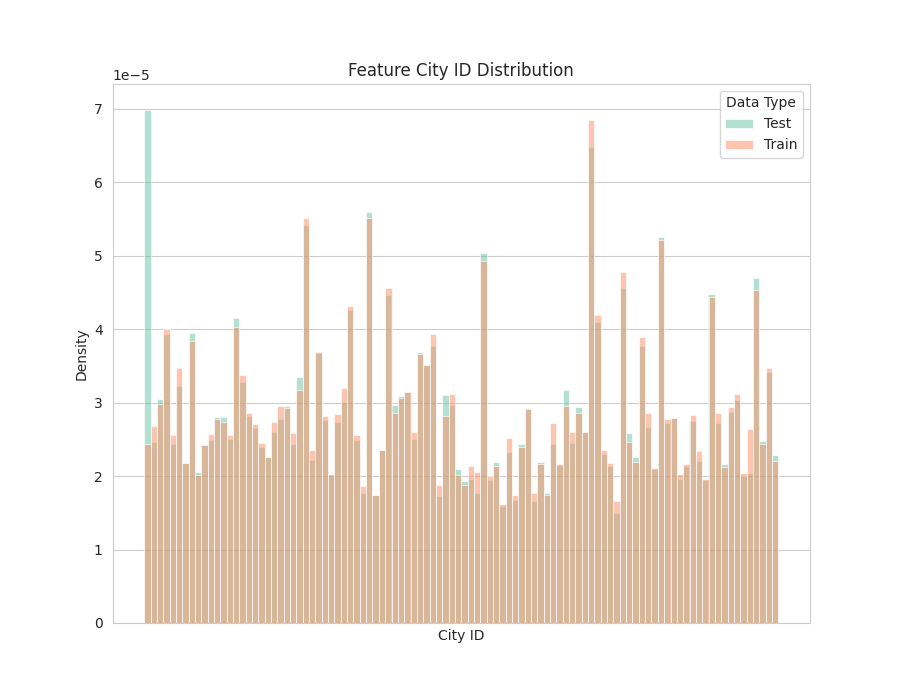

In [25]:
_, ax = plt.subplots(figsize=(9, 7))

sns.histplot(test_x.city_id, discrete=False, stat='density', bins=100, ax=ax, label='Test', 
             color=sns.color_palette()[0], alpha=0.5)
sns.histplot(train_x.city_id, discrete=False, stat='density', bins=100, ax=ax, label='Train', 
             color=sns.color_palette()[1], alpha=0.5)

ax.set(title='Feature City ID Distribution',
       xlabel='City ID',
       xticks=[])
ax.legend(title='Data Type');

### How many unknown City IDs we get in the test?

In [28]:
n_unknown_cities = len(test_x[test_x.city_id == 0])
unknown_cities_percentage = (n_unknown_cities / len(test_x)) * 100

print(f'Unknown cities percentage from test: {unknown_cities_percentage:.2f}%')
print(f'Unknown cities number from test: {n_unknown_cities}')

Unknown cities percentage from test: 1.63%
Unknown cities number from test: 1547


## Affiliate ID distribution

<IPython.core.display.Javascript object>


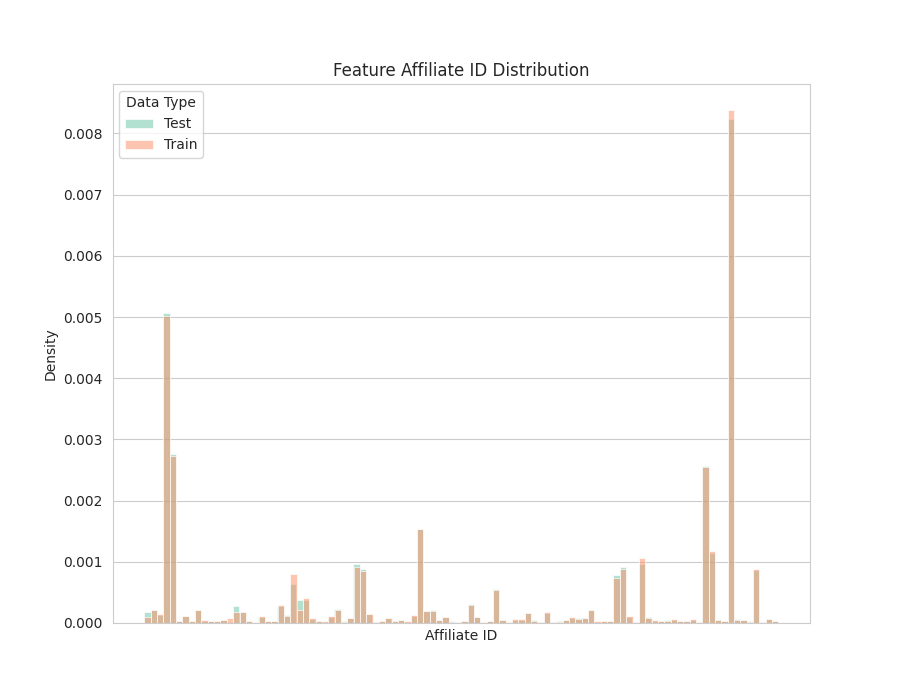

In [30]:
_, ax = plt.subplots(figsize=(9, 7))

sns.histplot(test_x.affiliate_id, discrete=False, stat='density', bins=100, ax=ax, label='Test', 
             color=sns.color_palette()[0], alpha=0.5)
sns.histplot(train_x.affiliate_id, discrete=False, stat='density', bins=100, ax=ax, label='Train', 
             color=sns.color_palette()[1], alpha=0.5)

ax.set(title='Feature Affiliate ID Distribution',
       xlabel='Affiliate ID',
       xticks=[])
ax.legend(title='Data Type');

## Time distribution

In the data, we transform the time dimension to the sin and cosine of the week number. To evaluate the time is equal we will go to the raw data and get the week nubmers and also examine the separate cosine and sin values

<IPython.core.display.Javascript object>


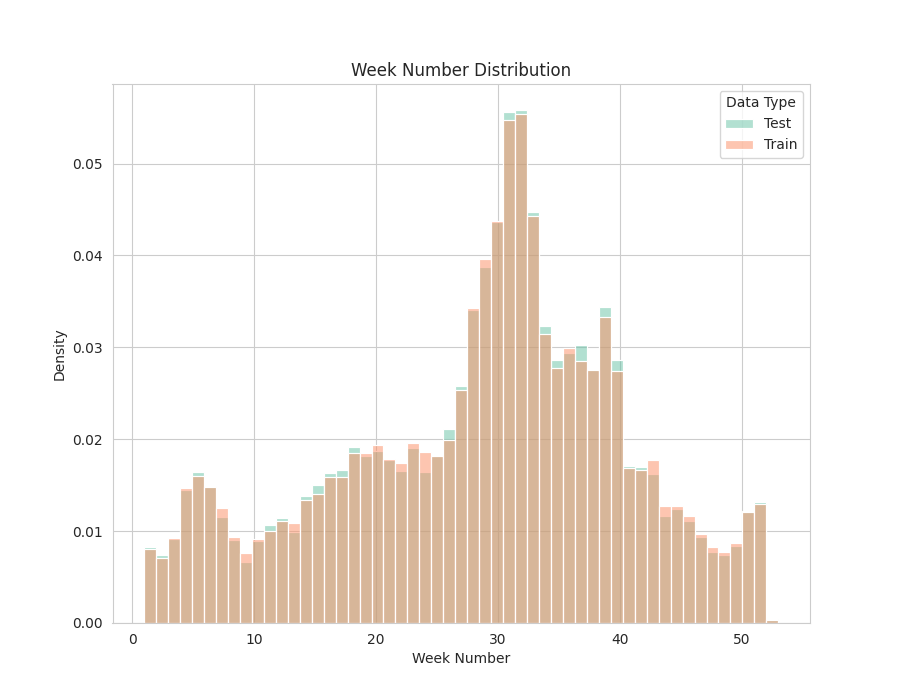

In [45]:
_, ax = plt.subplots(figsize=(9, 7))

sns.histplot(raw_test_x.checkin.dt.isocalendar().week, discrete=False, stat='density', bins=53, ax=ax, label='Test', 
             color=sns.color_palette()[0], alpha=0.5)
sns.histplot(raw_train_x.checkin.dt.isocalendar().week, discrete=False, stat='density', bins=53, ax=ax, label='Train', 
             color=sns.color_palette()[1], alpha=0.5)

ax.set(title='Week Number Distribution',
       xlabel='Week Number')
ax.legend(title='Data Type');

<IPython.core.display.Javascript object>


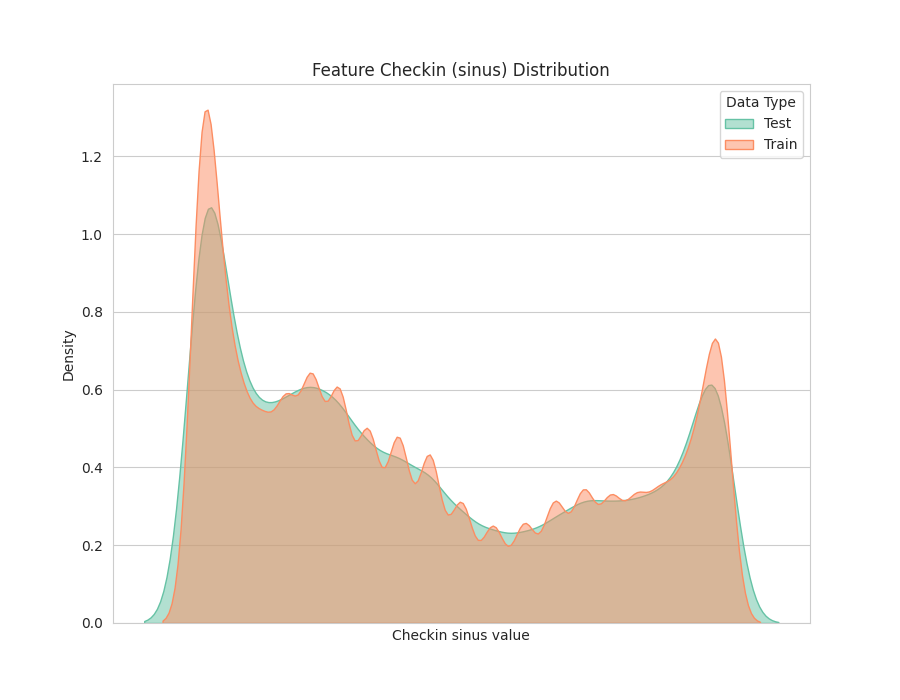

In [38]:
# Sin
_, ax = plt.subplots(figsize=(9, 7))

sns.kdeplot(test_x.checkin_sin.values.astype('float'), ax=ax, label='Test', fill=True,
             color=sns.color_palette()[0], alpha=0.5)
sns.kdeplot(train_x.checkin_sin.values.astype('float'), ax=ax, label='Train', fill=True,
             color=sns.color_palette()[1], alpha=0.5)

ax.set(title='Feature Checkin (sinus) Distribution',
       xlabel='Checkin sinus value',
       xticks=[])
ax.legend(title='Data Type');

<IPython.core.display.Javascript object>


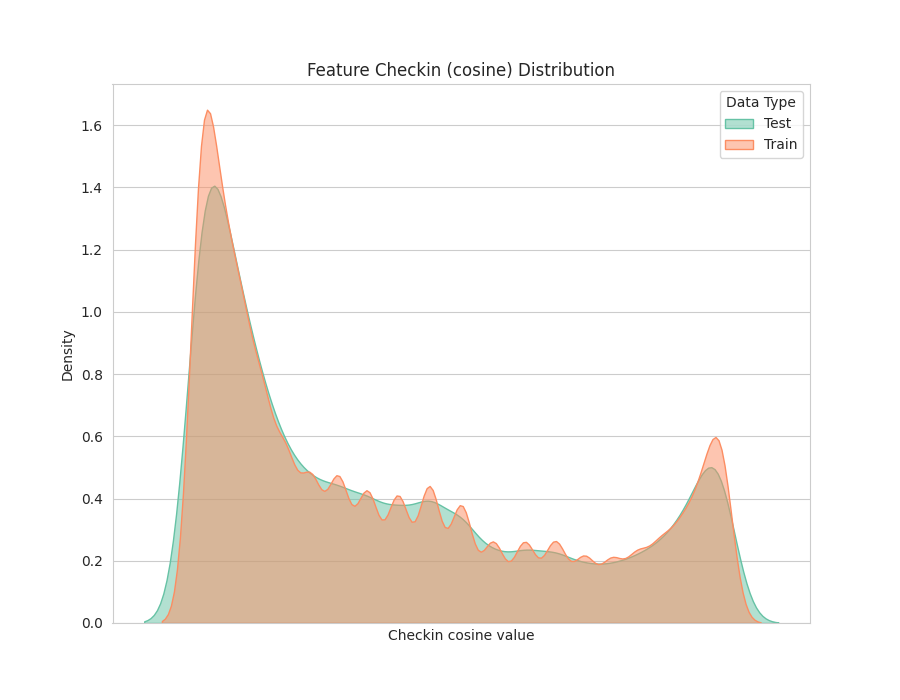

In [39]:
# Cos
_, ax = plt.subplots(figsize=(9, 7))

sns.kdeplot(test_x.checkin_cos.values.astype('float'), ax=ax, label='Test', fill=True,
             color=sns.color_palette()[0], alpha=0.5)
sns.kdeplot(train_x.checkin_cos.values.astype('float'), ax=ax, label='Train', fill=True,
             color=sns.color_palette()[1], alpha=0.5)

ax.set(title='Feature Checkin (cosine) Distribution',
       xlabel='Checkin cosine value',
       xticks=[])
ax.legend(title='Data Type');